In [4]:
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install numpy pandas-ta

/tmp/ipykernel_7258/3429557494.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Successfully downloaded data.
------------------------------
Data with Daily Returns calculated:
Price           Close       High        Low       Open     Volume Daily_Return
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL             
Date                                                                          
2015-01-05  23.604338  24.137518  23.417725  24.057541  257142000    -0.028172
2015-01-06  23.606558  23.866483  23.244438  23.668762  263188400     0.000094
2015-01-07  23.937569  24.037539  23.704302  23.815381  160423600     0.014022
2015-01-08  24.857304  24.915065  24.148618  24.266363  237458000     0.038422
2015-01-09  24.883970  25.159446  24.484084  25.030594  214798000     0.001073
------------------------------


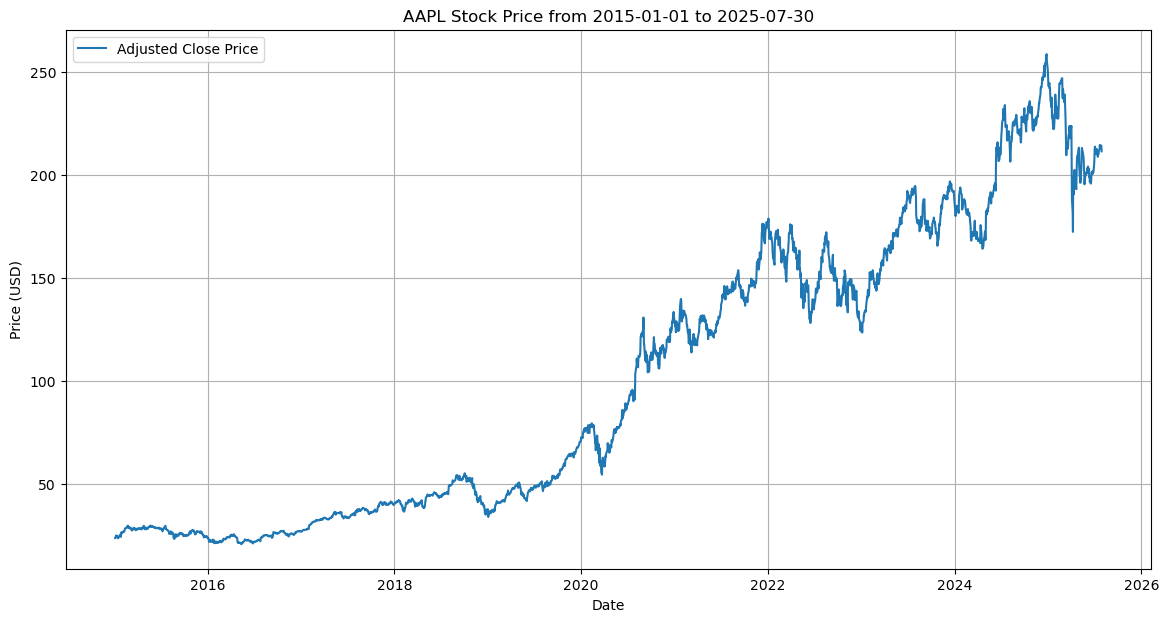

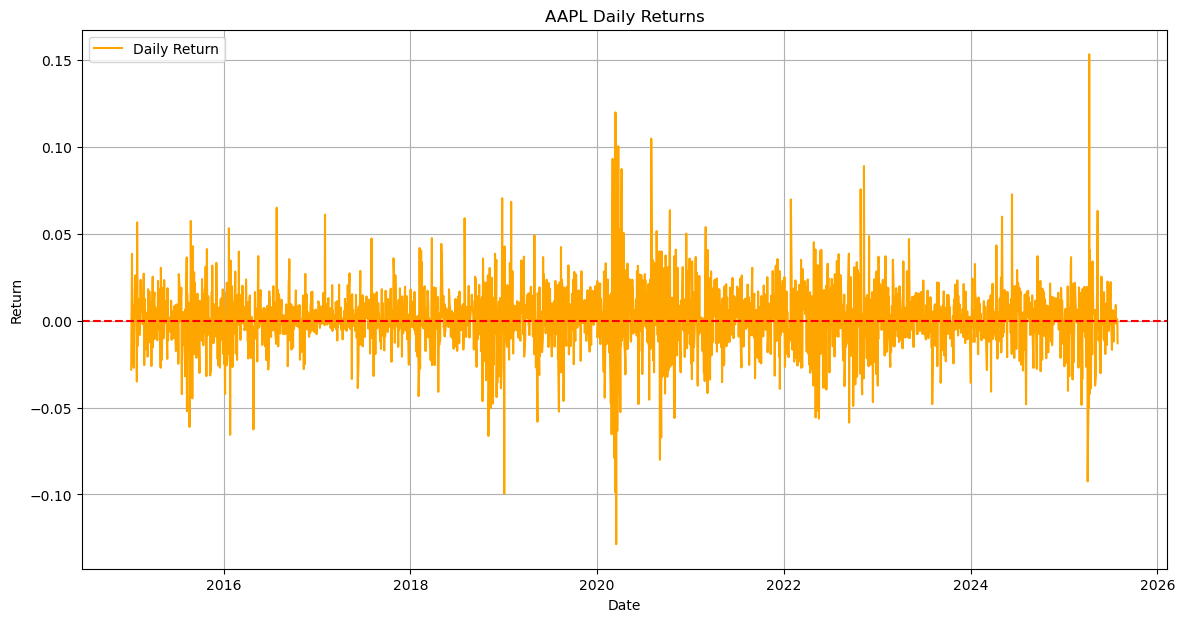

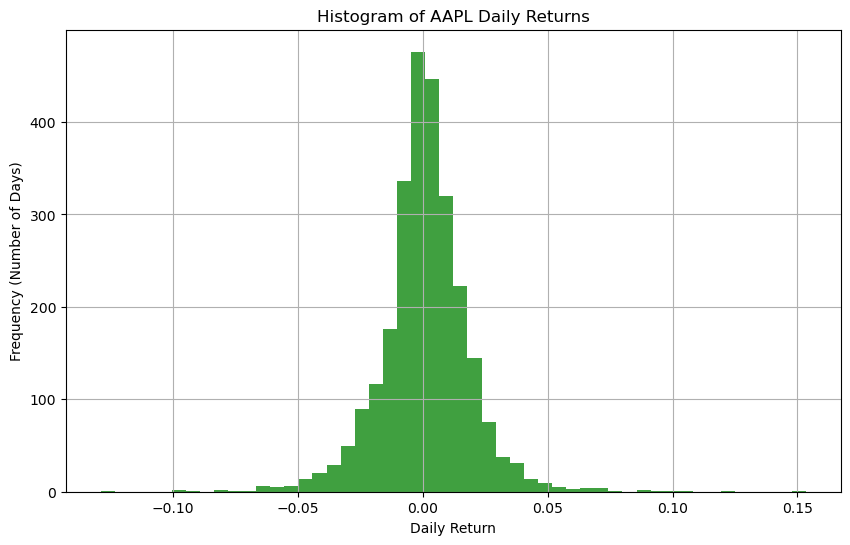

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

def analyze_stock(ticker, start_date, end_date):
    """
    Downloads stock data, calculates daily returns, and visualizes the results.

    Args:
        ticker (str): The stock ticker symbol (e.g., 'AAPL' for Apple).
        start_date (str): The start date for the data in 'YYYY-MM-DD' format.
        end_date (str): The end date for the data in 'YYYY-MM-DD' format.
    """
    try:
        #download stock data
        print(f"Downloading data for {ticker}...")
        stock_data = yf.download(ticker, start=start_date, end=end_date)

        if stock_data.empty:
            print(f"No data found for ticker {ticker} in the specified date range.")
            return

        print(f"Successfully downloaded data.")
        print("-" * 30)

       #calculate daily returns
        stock_data['Daily_Return'] = stock_data['Close'].pct_change()

        stock_data = stock_data.dropna()

        print("Data with Daily Returns calculated:")
        print(stock_data.head())
        print("-" * 30)

       #visualisation of the results
        plt.figure(figsize=(14, 7)) 
        plt.plot(stock_data['Close'], label='Adjusted Close Price')
        plt.title(f'{ticker} Stock Price from {start_date} to {end_date}')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.legend()
        plt.grid(True)
        plt.show() 

        #Volatility
        plt.figure(figsize=(14, 7))
        plt.plot(stock_data['Daily_Return'], label='Daily Return', color='orange')
        plt.title(f'{ticker} Daily Returns')
        plt.xlabel('Date')
        plt.ylabel('Return')
        plt.axhline(y=0, color='r', linestyle='--')
        plt.legend()
        plt.grid(True)
        plt.show()

        #distribution of the returns
        plt.figure(figsize=(10, 6))
        plt.hist(stock_data['Daily_Return'], bins=50, alpha=0.75, color='green')
        plt.title(f'Histogram of {ticker} Daily Returns')
        plt.xlabel('Daily Return')
        plt.ylabel('Frequency (Number of Days)')
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")


if __name__ == "__main__":
    # You can change these parameters to analyze different stocks or time periods
    stock_ticker = 'AAPL' # Apple Inc.
    start = '2015-01-01'
    end = date.today()

    analyze_stock(stock_ticker, start, end)


In [7]:
import yfinance as yf
import math

stock_ticker = 'AAPL'
start = '2015-01-01'
end = date.today()

print(f"Downloading data for {stock_ticker}...")
stock_data = yf.download(stock_ticker, start=start, end=end)
print("Download complete.")

# Calculate daily returns
stock_data['Daily_Return'] = stock_data['Close'].pct_change()
stock_data = stock_data.dropna()


#calculating the volatility


returns = stock_data['Daily_Return']

#Calculate the average daily return
mean_return = sum(returns) / len(returns)

#Calculate the squared differences from the mean
squared_diffs = []
for daily_return in returns:
    squared_diff = (daily_return - mean_return) ** 2
    squared_diffs.append(squared_diff)

#Calculate the variance

variance = sum(squared_diffs) / (len(returns) - 1)

#Calculate the standard deviation
daily_volatility_scratch = math.sqrt(variance)

#Annualize the volatility
annualized_volatility_scratch = daily_volatility_scratch * math.sqrt(252)



print("\n--- Volatility Calculated From Scratch ---")
print(f"Daily Volatility: {daily_volatility_scratch:.4f}")
print(f"Annualized Volatility: {annualized_volatility_scratch:.2%}")

/tmp/ipykernel_7258/2288481849.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock_ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Download complete.

--- Volatility Calculated From Scratch ---
Daily Volatility: 0.0183
Annualized Volatility: 29.07%
